<img src="https://comet.ml/images/logo_comet_light.png" width="200px"/>

# Comet.ml Python API

*This page is available as an executable or viewable **Jupyter Notebook**:* <br/>
<a href="https://mybinder.org/v2/gh/comet-ml/comet-examples/master?filepath=notebooks%2FComet-Python-API.ipynb" target="_parent"><img align="left" src="https://mybinder.org/badge_logo.svg"></a>
<a href="https://nbviewer.jupyter.org/github/comet-ml/comet-examples/blob/master/notebooks/Comet-Python-API.ipynb" target="_parent"><img align="right" src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.png" width="109" height="20"></a>
<br/>
<hr/>
Comet.ml has an extensive interface to all of your data using a [REST API](https://en.wikipedia.org/wiki/Representational_state_transfer) through [Comet.ml endpoints](https://www.comet.ml/docs/rest-api/endpoints/). Now, you can access this information easily through the Comet.ml Python SDK. Requires version comet_ml version 3.0.0 or greater.

## Setup

To run the following experiments, you'll need to set your COMET_API_KEY and COMET_REST_API_KEY. The easiest way to to this is to set the values in a cell like this:

```python
import comet_ml

comet_ml.save(api_key="...", rest_api_key="...")
```
where you replace the ...'s with your keys.

You can get your COMET_API_KEY under your quickstart link (replace YOUR_USERNAME with your Comet.ml username):

https://www.comet.ml/YOUR_USERNAME/quickstart

You can get your COMET_REST_API_KEY under your settings (replace YOUR_USERNAME with your Comet.ml username):

https://www.comet.ml/YOUR_USERNAME/settings/account

## Quick Overview

To access the Python API through the Comet.ml SDK, you will need to make an API() instance. 

**Note: this is a new interface.**

### What's new?

The new API:

* is faster, having more items cached
* allows setting and logging more items
* `APIExperiment` now works similarly to `Experiment`, `ExistingExperiment`, and `OfflineExperiment`
* has a consistent interface

Let's try it out! 

First, we import the API class and other libraries we will need. Note that this is a new interface and comes from `comet_ml.api`:

In [1]:
from comet_ml import API
import comet_ml

import matplotlib.pyplot as plt
%matplotlib inline

and create the API instance:

In [2]:
comet_api = API()

Using the `comet_api` instance, you can get the name of your workspaces:

In [3]:
comet_api.get()

['sampleworkspace', 'cometpublic']

If you reference your workspace by name using `comet_api.get(WORKSPACE_NAME)`, you'll see your projects:

In [4]:
print(comet_api.get("cometpublic"))

['caffe2', 'ludwig', 'comet-sagemaker', 'fasttext', 'comet-notebooks', 'shap', 'parameter-space-exploration', 'comet-examples', 'fastai', '3d-histograms', 'pyspark-example', 'general', 'keras-example', 'home-credit']


Or, get the projects from another user or shared workspace:

In [5]:
comet_api.get("testuser")

['mnist']

Using the same method, you can refer to a project by name and get all of the experiments in a project:

In [6]:
comet_api.get("cometpublic", "fasttext")

[<APIExperiment 'cometpublic/fasttext/18e88395f6c44ffc9930c5323935f5d9'>,
 <APIExperiment 'cometpublic/fasttext/23db3466c7134a34b591de011c7595ba'>,
 <APIExperiment 'cometpublic/fasttext/52a4939f477c41e9936a3e16b87be324'>,
 <APIExperiment 'cometpublic/fasttext/990f58b9447b453ab18da1ea75cde85a'>,
 <APIExperiment 'cometpublic/fasttext/44ea2d68794d4c5e9e18b86c30562bf8'>,
 <APIExperiment 'cometpublic/fasttext/034d73233bdd45b7861c2acca66f90a1'>,
 <APIExperiment 'cometpublic/fasttext/86de6a38bd41489895bfdb44f74ab928'>,
 <APIExperiment 'cometpublic/fasttext/f0f23c9825834fd6a8d6ebfd2baeea26'>,
 <APIExperiment 'cometpublic/fasttext/328cf1303126404b96a32e8146c0bc89'>,
 <APIExperiment 'cometpublic/fasttext/dab224910ff44bb8aa0718612578584f'>,
 <APIExperiment 'cometpublic/fasttext/7005afd6a42446aab657e3d8255d01a3'>,
 <APIExperiment 'cometpublic/fasttext/17db4a9d68124b0bb6f78c805f78ab49'>,
 <APIExperiment 'cometpublic/fasttext/62d92ee769ca4ae19165deaf6653095c'>,
 <APIExperiment 'cometpublic/fasttext/

Or, using the slash delimiter:

In [7]:
comet_api.get("cometpublic/fasttext")

[<APIExperiment 'cometpublic/fasttext/18e88395f6c44ffc9930c5323935f5d9'>,
 <APIExperiment 'cometpublic/fasttext/23db3466c7134a34b591de011c7595ba'>,
 <APIExperiment 'cometpublic/fasttext/52a4939f477c41e9936a3e16b87be324'>,
 <APIExperiment 'cometpublic/fasttext/990f58b9447b453ab18da1ea75cde85a'>,
 <APIExperiment 'cometpublic/fasttext/44ea2d68794d4c5e9e18b86c30562bf8'>,
 <APIExperiment 'cometpublic/fasttext/034d73233bdd45b7861c2acca66f90a1'>,
 <APIExperiment 'cometpublic/fasttext/86de6a38bd41489895bfdb44f74ab928'>,
 <APIExperiment 'cometpublic/fasttext/f0f23c9825834fd6a8d6ebfd2baeea26'>,
 <APIExperiment 'cometpublic/fasttext/328cf1303126404b96a32e8146c0bc89'>,
 <APIExperiment 'cometpublic/fasttext/dab224910ff44bb8aa0718612578584f'>,
 <APIExperiment 'cometpublic/fasttext/7005afd6a42446aab657e3d8255d01a3'>,
 <APIExperiment 'cometpublic/fasttext/17db4a9d68124b0bb6f78c805f78ab49'>,
 <APIExperiment 'cometpublic/fasttext/62d92ee769ca4ae19165deaf6653095c'>,
 <APIExperiment 'cometpublic/fasttext/

And one more level, get an `APIExperiment` object using the Experiment's ID:

In [8]:
comet_api.get("cometpublic", "fasttext", 'e64c5915920f481bab8f4cb4dbd615be')

<APIExperiment 'cometpublic/fasttext/e64c5915920f481bab8f4cb4dbd615be'>

Or, again using the slash shorthand:

In [9]:
comet_api.get("cometpublic/fasttext/e64c5915920f481bab8f4cb4dbd615be")

<APIExperiment 'cometpublic/fasttext/e64c5915920f481bab8f4cb4dbd615be'>

Let's get an experiment and save it to a variable named `exp`:

In [10]:
exp = comet_api.get("cometpublic/fasttext/e64c5915920f481bab8f4cb4dbd615be")

In [11]:
exp

<APIExperiment 'cometpublic/fasttext/e64c5915920f481bab8f4cb4dbd615be'>

There are a number of items you get and set from the APIExperiment instance. For a complete reference, see: https://www.comet.ml/docs/python-sdk/API/

For example, we can explore the `other` property, which shows items saved with Experiment.log_other(NAME, VALUE):

In [12]:
exp.get_others_summary()

[{'name': 'Name',
  'valueMax': 'last',
  'valueMin': 'last',
  'valueCurrent': 'last'},
 {'name': 'storage_size_bytes',
  'valueMax': '0',
  'valueMin': '0',
  'valueCurrent': '0',
  'timestampMax': 1574708415277,
  'timestampMin': 1574708415277,
  'timestampCurrent': 1574708415277},
 {'name': 'trainable_params',
  'valueMax': '376560',
  'valueMin': '376560',
  'valueCurrent': '376560',
  'timestampMax': 1529089066169,
  'timestampMin': 1529089066169,
  'timestampCurrent': 1529089066169}]

In this example, we see that the experiment has the `Name` "last". We can use `Name` to also look up experiments:

In [13]:
exp = comet_api.get("cometpublic/fasttext/last")
exp.id, exp.name

('e64c5915920f481bab8f4cb4dbd615be', 'last')

Perhaps one of the most useful abilities for the Python API is to access your experiment's data in order to create a variation of a plot. To access the raw metric data, use the `.get_metrics()` method of the APIExperiment:

In [14]:
len(exp.get_metrics())

2804

We see here were over 2800 metrics logged during the training of this experiment. We can get the first using indexing with an integer:

In [15]:
exp.get_metrics()[0]

{'metricName': 'val_acc',
 'metricValue': '0.9832226913061168',
 'timestamp': 1529089066713,
 'step': 69,
 'epoch': None,
 'runContext': None,
 'offset': 314}

That shows that the "acc" (accuracy) metric had a value of about 0.5 at step 1 of the experiment.

We can also filter on a single metric name, like so:

In [16]:
acc_metrics = exp.get_metrics("acc")

In [17]:
len(acc_metrics)

700

In [18]:
acc_metrics[0]

{'metricName': 'acc',
 'metricValue': '0.5003255009651184',
 'timestamp': 1529089066219,
 'step': 1,
 'epoch': None,
 'runContext': None,
 'offset': 29}

Therefore, `exp.get_metrics("acc")` gives us the dictionary for all "acc" items. We can then easily use Python's built in zip and matplotlib to plot these values:

In [19]:
steps_acc = [(m["step"], float(m["metricValue"])) for m in acc_metrics]

This breaks up the data into (step, value) pairs:

In [20]:
steps_acc[0]

(1, 0.5003255009651184)

A little Python trick to separate the steps from the accuracies so we can easily use matplotlib:

In [21]:
steps, acc = zip(*steps_acc[:100]) # just the first 100 for now

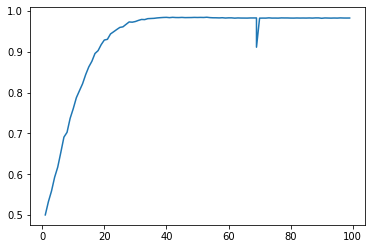

In [22]:
plt.plot(steps, acc);

That's it for a quick overview. Now let's look in detail at each component.

## Workspaces

`comet_api.get()` reports your workspace names:

In [23]:
comet_api.get()

['sampleworkspace', 'cometpublic']

You can also interate over those names:

In [24]:
for workspace in comet_api.get():
    print(workspace)

sampleworkspace
cometpublic


As we saw above, you can also access other public workspaces as well:

In [25]:
comet_api.get("testuser")

['mnist']

## Projects

Under get(WORKSPACE_NAME), you'll find the projects:

In [26]:
comet_api.get("cometpublic")

['caffe2',
 'ludwig',
 'comet-sagemaker',
 'fasttext',
 'comet-notebooks',
 'shap',
 'parameter-space-exploration',
 'comet-examples',
 'fastai',
 '3d-histograms',
 'pyspark-example',
 'general',
 'keras-example',
 'home-credit']

In [27]:
project = comet_api.get("cometpublic", "comet-notebooks")
## OR:
#project = comet_api.get("cometpublic/comet-notebooks")

If you just print out, or iterate over a project, you get access to the experiments:

In [28]:
project

[<APIExperiment 'cometpublic/comet-notebooks/7092a5e4c362453fb0b3f06785a1d30c'>,
 <APIExperiment 'cometpublic/comet-notebooks/d21f94a1c71841d2961da1e6ddb5ab20'>]

In [29]:
project[0].id, project[0].name

('7092a5e4c362453fb0b3f06785a1d30c', None)

In [30]:
project[1].id, project[1].name

('d21f94a1c71841d2961da1e6ddb5ab20', 'example 001')

## Experiments

Continuing with the dictionary-like access, you can see and iterate over the experiment ids:

In [31]:
comet_api.get("cometpublic", "comet-notebooks")

[<APIExperiment 'cometpublic/comet-notebooks/7092a5e4c362453fb0b3f06785a1d30c'>,
 <APIExperiment 'cometpublic/comet-notebooks/d21f94a1c71841d2961da1e6ddb5ab20'>]

In [32]:
exp = comet_api.get("cometpublic", "comet-notebooks", 'd21f94a1c71841d2961da1e6ddb5ab20')
## OR
# exp = comet_api.get("cometpublic/comet-notebooks/d21f94a1c71841d2961da1e6ddb5ab20")
exp

<APIExperiment 'cometpublic/comet-notebooks/d21f94a1c71841d2961da1e6ddb5ab20'>

In [33]:
exp = comet_api.get("cometpublic", "comet-notebooks", 'example 001')
## OR
## exp = comet_api.get("cometpublic/comet-notebooks/example 001")
exp

<APIExperiment 'cometpublic/comet-notebooks/d21f94a1c71841d2961da1e6ddb5ab20'>

### Regular Expression Experiment Name Matching

You can also use regular expressions as the name for the experiment:

In [34]:
comet_api.get_experiments("cometpublic", "comet-notebooks", "example.*")

[<APIExperiment 'cometpublic/comet-notebooks/d21f94a1c71841d2961da1e6ddb5ab20'>]

### Query API

The Python API provides programmatic access to the same query system in the web UI. There are 5 types of items that you can query:

* Metric: items logged with `log_metric()`
* Metadata: items logged by the system
* Other: items logged with `log_other()`
* Parameter: items logged with `log_parameter()`
* Tag: items logged with `add_tags()`

To use these, you first need to import them:

In [36]:
from comet_ml.api import Metric, Metadata, Other, Parameter, Tag

You can then use these to build a query expression, like so:

In [37]:
comet_api.query("cometpublic", "general", Parameter("max_iter") == 100)

[<APIExperiment 'cometpublic/general/4d4fba0f6bac4420bb5948e41015c114'>,
 <APIExperiment 'cometpublic/general/be44937e416b4b62be79ee2e7c0c3c4e'>]

The API.query() method takes the following args:

* workspace: String, the name of the workspace
* project_name: String, the name of the project
* query: a query expression (see below)
* archived: (optional boolean), query the archived experiments if True

A query is of the form:

```python
((QUERY-VARIABLE OPERATOR VALUE) & ...)

# or:

(QUERY-VARIABLE.METHOD(VALUE) & ...)
```

where:

* `QUERY-VARIABLE` is `Metric(NAME)`, `Parameter(NAME)`, `Other(NAME)`, `Metadata(NAME)`, or `Tag(VALUE)`.
* `OPERATOR` is any of the standard mathematical operators `==`, `<=`, `>=`, `!=`, `<`, `>`.
* `METHOD` is `between()`, `contains()`, `startswith()`, or `endswith()`.

You may also place the bitwise `~` not operator in front of an expression
which means to invert the expression. Use `&` to combine additional
criteria. Currently, `|` (bitwise or) is not supported.

`VALUE` can be any query type, includeing `string`, `boolean`, `double`,
`datetime`, or `timenumber` (number of seconds). `None` and `""` are special
values that mean `NULL` and `EMPTY`, respectively. Use
`API.get_project_variables(WORKSPACE, PROJECT_NAME)` to see query variables
and types for a project.

When using `datetime`, be aware that the backend is using UTC datetimes. If you
do not receive the correct experiments via a datetime query, please check with
the web UI query builder to verify timezone of the server.

`query()` returns a list of matching `APIExperiments()`.

Examples:

```python
# Find all experiments that have an acc metric value > .98:
>>> api.query("workspace", "project", Metric("acc") > .98)
[APIExperiment(), ...]

# Find all experiments that have a loss metric < .1 and
# a learning_rate parameter value >= 0.3:
>>> loss = Metric("loss")
>>> lr = Parameter("learning_rate")
>>> query = ((loss < .1) & (lr >= 0.3))
>>> api.query("workspace", "project", query)
[APIExperiment(), ...]

# Find all of the experiments tagged "My simple tag":
>>> tagged = Metric("My simple tag")
>>> api.query("workspace", "project", tagged)
[APIExperiment(), ...]

# Find all experiments started before Sept 24, 2019 at 5:00am:
>>> q = Metadata("start_server_timestamp") < datetime(2019, 9, 24, 5)
>>> api.query("workspace", "project", q)
[APIExperiment(), ...]

# Find all experiments lasting more that 2 minutes (in seconds):
>>> q = Metadata("duration") > (2 * 60)
>>> api.query("workspace", "project", q)
[APIExperiment(), ...]
```

Notes:

* Use `~` for `not` on any expression
* Use `~QUERY-VARIABLE.between(2,3)` for values not between 2 and 3
* Use `(QUERY-VARIABLE == True)` for truth
* Use `(QUERY-VARIABLE == False)` for not true
* Use `(QUERY-VARIABLE == None)` for testing null
* Use `(QUERY-VARIABLE != None)` or `~(QUERY-VARIABLE == None)` for testing not null
* Use `(QUERY-VARIABLE == "")` for testing empty
* Use `(QUERY-VARIABLE != "")` or `~(QUERY-VARIABLE == "")` for testing not empty
* Use Python's datetime(YEAR, MONTH, DAY, HOUR, MINUTE, SECONDS) for comparing datetimes, like
    `Metadata("start_server_timestamp")` or `Metadata("end_server_timestamp")`
* Use seconds for comparing timenumbers, like `Metadata("duration")`
* Use `API.get_project_variables(WORKSPACE, PROJECT_NAME)` to see query variables
    and types.

Do not use 'and', 'or', 'not', 'is', or 'in'. These are logical operators and you must use mathematical operators for queries. For example, always use '==' where you might usually use 'is'.

How can you know what query variables are available for a project? Use API.get_query_variables(WORKSPACE, PROJECT_NAME):

In [38]:
vars = comet_api.get_query_variables("cometpublic", "general")

In [39]:
vars

[Metadata('hasNotes'),
 Metadata('duration'),
 Metric('sys.cpu.percent.04'),
 Parameter('warm_start'),
 Metric('sys.cpu.percent.avg'),
 Parameter('learning_rate'),
 Metric('train_reg_mean_loss'),
 Metadata('file_name'),
 Metric('sys.ram.total'),
 Parameter('beta2'),
 Metadata('experimentKey'),
 Parameter('run_arg_2'),
 Metric('sys.ram.used'),
 Parameter('intercept_scaling'),
 Metadata('end_server_timestamp'),
 Metric('sys.cpu.percent.08'),
 Metadata('file_path'),
 Metadata('runActive'),
 Parameter('C'),
 Metric('class/train_batch_mean_hits_at_k_class'),
 Parameter('run_arg_4'),
 Parameter('max_iter'),
 Metadata('runId'),
 Metric('sys.cpu.percent.03'),
 Parameter('curr_step'),
 Parameter('class_weight'),
 Parameter('multi_class'),
 Metric('sys.cpu.percent.01'),
 Parameter('fit_intercept'),
 Metadata('optimizationId'),
 Parameter('run_arg_3'),
 Metric('sys.cpu.percent.02'),
 Parameter('penalty'),
 Parameter('beta1'),
 Metadata('codeSHA'),
 Parameter('epsilon'),
 Parameter('solver'),
 Met

### Experiment Properties

In this brief dictionary representation, you will see that `get_others_summary()`, `get_metrics_summary()` and `get_parameters_summary()` give summary data for each item:

In [40]:
exp.get_parameters_summary()

[{'name': 'f',
  'valueMax': '/run/user/1000/jupyter/kernel-b1c4403c-c673-4e7f-90dc-853616d231e2.json',
  'valueMin': '/run/user/1000/jupyter/kernel-b1c4403c-c673-4e7f-90dc-853616d231e2.json',
  'valueCurrent': '/run/user/1000/jupyter/kernel-b1c4403c-c673-4e7f-90dc-853616d231e2.json',
  'timestampMax': 1542823692798,
  'timestampMin': 1542823692798,
  'timestampCurrent': 1542823692798}]

In [41]:
exp.get_others_summary()[0]["name"], exp.get_others_summary()[0]["valueCurrent"]

('Name', 'example 001')

In [42]:
exp.get_metrics_summary("train_loss")

{'name': 'train_loss',
 'valueMax': '2.3872790336608887',
 'valueMin': '2.3872790336608887',
 'valueCurrent': '2.3872790336608887',
 'timestampMax': 1542823695820,
 'timestampMin': 1542823695820,
 'timestampCurrent': 1542823695820,
 'runContextMax': 'train',
 'runContextMin': 'train',
 'runContextCurrent': 'train',
 'stepMax': 0,
 'stepMin': 0,
 'stepCurrent': 0}

You can see more information on the methods and propeties on an APIExperiment instance here: https://www.comet.ml/docs/python-sdk/APIExperiment/

Just like when creating and logging data, you can also use the `.display()` method to show the Comet.ml page for that experiment right in the notebook:

In [43]:
exp.display()

### Logging data

With this version of the API, you can now easily log, set, and add data to an experiment, either one that you just created, or one that existed previously.

To create a new APIExperiment, you can (assuming that your API key, REST API key, workspace, and project name have been set in a Comet configure file):

```python
from comet_ml.api import APIExperiment
api_experiment = APIExperiment()
```

If you have not set your API key, REST API key, workspace, and project name, you can pass any and all to the constructor:

```python
from comet_ml.api import APIExperiment
api_experiment = APIExperiment(api_key="MY-KEY", 
                               rest_api_key="MY-REST-KEY", 
                               workspace="MY-WORKSPACE",
                               project_name="MY-PROJECT")
```

To create an APIExperiment from a previously-made experiment, you can (assuming that your keys have been set):

```python
from comet_ml.api import APIExperiment
api_experiment = APIExperiment(previous_experiment="7364746746743746") # previous experiment key or name
```

If you have not set your API key, REST API key, you can pass them to the constructor:

```python
from comet_ml.api import APIExperiment
api_experiment = APIExperiment(api_key="MY-KEY", 
                               rest_api_key="MY-REST-KEY",
                               previous_experiment="7364746746743746")
```

Once you have an APIExperiment, you can log, set, and add items to the experiment. You can use any of the following methods:

* api_experiment.log_output(lines, context=None, stderr=False)
* api_experiment.log_other(key, value)
* api_experiment.log_parameter(parameter, value, step=None)
* api_experiment.log_metric(metric, value, step=None)
* api_experiment.log_html(html, overwrite=False)
* api_experiment.log_asset(filename, step=None, overwrite=None, context=None)
* api_experiment.log_image(filename, image_name=None, step=None, overwrite=None, context=None)
* api_experiment.add_tags(tags)
* api_experiment.set_code(code)
* api_experiment.set_model_graph(graph)
* api_experiment.set_os_packages(os_packages)
* api_experiment.set_start_time(start_server_timestamp)
* api_experiment.set_end_time(end_server_timestamp)

### Existing Experiments

For many aspects of an experiment, you can log them with the Python API. However, to get the full power of the streaming `Experiment` interface, you can create an `ExistingExperiment`.

First, we can look up an experiment using any of the methods outlined here:

In [44]:
api_experiment = comet_api.get("cometpublic", "comet-notebooks", 'example 001')

Then, we can use the APIExperiment.id property to make an `ExistingExperiment`:

In [45]:
existing_experiment = comet_ml.ExistingExperiment(previous_experiment=api_experiment.id)

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/cometpublic/comet-notebooks/d21f94a1c71841d2961da1e6ddb5ab20



You can make changes to the saved data using the existing experiment:

https://www.comet.ml/docs/python-sdk/ExistingExperiment/

In [46]:
existing_experiment.end()

COMET INFO: ----------------------------
COMET INFO: Comet.ml Experiment Summary:
COMET INFO:   Data:
COMET INFO:     url: https://www.comet.ml/cometpublic/comet-notebooks/d21f94a1c71841d2961da1e6ddb5ab20
COMET INFO: ----------------------------
COMET INFO: Uploading stats to Comet before program termination (may take several seconds)


### Examples

As seen above, you can use the Query API that allows highly efficient queries of your data. However, you can also write your own query of sorts if you need to go beyond what the Query API provides.

Here is some code that prints out the names of experiments that have associated HTML (this can take a long time if you have many experiments):

In [47]:
%%time
workspace = "dsblank"
found = False
for project in comet_api.get(workspace):
    if found:
        break
    print("    processing project", project, "...")
    print("        processing experiment", exp.id, end="")
    for exp in comet_api.get(workspace, project):
        print(".", end="")
        if exp.get_html() != None:
            print("\nFound html in %s!" % exp.url)
            found = True
            break
    print()

    processing project release-2-0-12c ...
        processing experiment d21f94a1c71841d2961da1e6ddb5ab20.
Found html in https://www.comet.ml/dsblank/release-2-0-12c/0f22eef674174082b8bcb2b78b116343!

CPU times: user 45.1 ms, sys: 1.01 ms, total: 46.1 ms
Wall time: 1 s


Here is a function that will find the first experiment that has associated images:

In [48]:
def find_image():
    for workspace in comet_api.get():
        for project in comet_api.get(workspace):
            for exp in comet_api.get(workspace, project):
                if exp.get_asset_list(asset_type="image") != []:
                    return exp

In [49]:
find_image()

<APIExperiment 'cometpublic/ludwig/02a0ed902ce2481fb6e2fc9009ee593c'>

Now, we get the experiment API and explore the `APIExperiment.get_asset_list()` method:

In [50]:
comet_api.get('cometpublic/ludwig/02a0ed902ce2481fb6e2fc9009ee593c').get_asset_list(asset_type="image")

[{'fileName': 'Figure(640x480).svg',
  'fileSize': 35241,
  'runContext': None,
  'step': None,
  'link': 'https://s3.amazonaws.com/comet.ml/yLB5azBCky96p5Q5IJJJA4est.svg',
  'compressedAssetLink': None,
  'createdAt': 1555703549582,
  'dir': 'media',
  'canView': True,
  'audio': False,
  'video': False,
  'histogram': False,
  'image': True,
  'type': 'image',
  'metadata': None,
  'assetId': '5b6a596de48041c08c3395d80cc436f6'},
 {'fileName': 'Figure(640x480) (1).svg',
  'fileSize': 34144,
  'runContext': None,
  'step': None,
  'link': 'https://s3.amazonaws.com/comet.ml/kkn1Ca1jRnYCFa8SRCy2RMGUT.svg',
  'compressedAssetLink': None,
  'createdAt': 1555703600815,
  'dir': 'media',
  'canView': True,
  'audio': False,
  'video': False,
  'histogram': False,
  'image': True,
  'type': 'image',
  'metadata': None,
  'assetId': '2d45468babff4bb08befcbc03f3af2fb'},
 {'fileName': 'Figure(640x480) (2).svg',
  'fileSize': 34700,
  'runContext': None,
  'step': None,
  'link': 'https://s3.amaz

We can get a URL for the image, and display it in the notebook:

In [51]:
asset_list = comet_api.get('cometpublic/ludwig/02a0ed902ce2481fb6e2fc9009ee593c').get_asset_list(asset_type="image")
url = asset_list[0]["link"]
url

'https://s3.amazonaws.com/comet.ml/yLB5azBCky96p5Q5IJJJA4est.svg'

In [52]:
from IPython.display import Image

In [53]:
Image(url=url)

Now, let's write a short program that will find the run with the best accuracy given a workspace/project string:

Can we get all of the `hidden_size` parameter values for the experiments in dsblank/pytorch?

In [54]:
[[p["valueCurrent"] for p in exp.get_parameters_summary()] for exp in comet_api.get("dsblank/pytorch")]

[['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', 'true', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2', '2', '28'],
 ['100', '128', '28', '0.01', '10', '2

In [55]:
experiments = [[(exp, "hidden_size", int(param["valueCurrent"])) 
                for param in exp.get_parameters_summary() 
                if param["name"] == "hidden_size"]
               for exp in comet_api.get("dsblank/pytorch")]
experiments = [e[0] for e in experiments if len(e) > 0]

In [56]:
experiments[0]

(<APIExperiment 'dsblank/pytorch/5f540fc7894146f4bbfd21ebe8549fcf'>,
 'hidden_size',
 128)

### Assets

To get an asset, you need to get the asset_id. You can see all of the assets related to a project using the `APIExperiment.get_asset_list()`:

In [57]:
def find_asset(workspaces):
    for ws in workspaces or comet_api.get():
        for pj in comet_api.get(ws):
            for exp in comet_api.get(ws, pj):
                if exp.get_asset_list() != []:
                    return (exp, exp.get_asset_list())
exp, elist = find_asset(["cometpublic"])

In [58]:
exp

<APIExperiment 'cometpublic/ludwig/02a0ed902ce2481fb6e2fc9009ee593c'>

In [59]:
len(elist)

15

From there, you can use the `APIExperiment.get_asset(asset_id)` method to get the asset.

In [60]:
description = exp.get_asset("0b256dc8858f4fbeb09228bc96074341", return_type="json")

In [61]:
print(description)

{'command': '/Users/ceceliashao/.local/bin/ludwig experiment --data_csv reuters-allcats.csv --model_definition_file model_definition.yaml', 'commit_hash': '5fbec5d311db', 'dataset_type': 'generic', 'input_data': 'reuters-allcats.csv', 'ludwig_version': '0.1.1', 'model_definition': {'combiner': {'type': 'concat'}, 'input_features': [{'encoder': 'parallel_cnn', 'level': 'word', 'name': 'text', 'tied_weights': None, 'type': 'text'}], 'output_features': [{'dependencies': [], 'loss': {'class_similarities_temperature': 0, 'class_weights': 1, 'confidence_penalty': 0, 'distortion': 1, 'labels_smoothing': 0, 'negative_samples': 0, 'robust_lambda': 0, 'sampler': None, 'type': 'softmax_cross_entropy', 'unique': False, 'weight': 1}, 'name': 'class', 'reduce_dependencies': 'sum', 'reduce_input': 'sum', 'top_k': 3, 'type': 'category'}], 'preprocessing': {'bag': {'fill_value': '', 'format': 'space', 'lowercase': False, 'missing_value_strategy': 'fill_with_const', 'most_common': 10000}, 'binary': {'fi

We hope that this gives you some ideas of how you can use the Comet Python API!